In [1]:
#importing all the necesssary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

## Understanding the data

In [2]:
#reading the dataset
houseDf = pd.read_csv('train.csv', index_col ='Id')
houseDf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houseDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [4]:
#describing the dataset
houseDf.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#Checking the shape of the dataframe
houseDf.shape

(1460, 80)

## Data Cleaning

In [6]:
# Converting YearBuilt into number of years and dropping the other date columns
import datetime
now = datetime.datetime.now()
houseDf['BuiltAge'] = now.year-houseDf['YearBuilt']
#houseDf['YrSoldAge'] = now.year-houseDf['YrSold']
#houseDf['GarageYrBltAge'] = now.year-houseDf['GarageYrBlt']
#houseDf['YearRemodAddAge'] = now.year-houseDf['YearRemodAdd']

houseDf.drop(['YearBuilt','YrSold','GarageYrBlt','YearRemodAdd'], axis=1,inplace=True)
houseDf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,BuiltAge
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,WD,Normal,208500,17
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,WD,Normal,181500,44
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,WD,Normal,223500,19
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,WD,Abnorml,140000,105
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,WD,Normal,250000,20


In [7]:
# Checking from data dictionary where NA is an actual data field and replacing NaN with None

houseDf['Alley'].fillna('None', inplace=True)
houseDf['BsmtQual'].fillna('None', inplace=True)
houseDf['BsmtCond'].fillna('None', inplace=True)
houseDf['BsmtExposure'].fillna('None', inplace=True)
houseDf['BsmtFinType1'].fillna('None', inplace=True)
houseDf['BsmtFinType2'].fillna('None', inplace=True)
houseDf['FireplaceQu'].fillna('None', inplace=True)
houseDf['GarageType'].fillna('None', inplace=True)
houseDf['GarageFinish'].fillna('None', inplace=True)
houseDf['GarageQual'].fillna('None', inplace=True)
houseDf['GarageCond'].fillna('None', inplace=True)
houseDf['PoolQC'].fillna('None', inplace=True)
houseDf['Fence'].fillna('None', inplace=True)
houseDf['MiscFeature'].fillna('None', inplace=True)

In [8]:
# Deleting any rows having more than 50 missing values
houseDf.drop(houseDf[houseDf.isnull().sum(axis=1)>50].index, axis=0, inplace = True)

In [9]:
houseDf.shape

(1460, 77)

In [10]:
#Checking the missing value percentage column wise.
round(100*(houseDf.isnull().sum()/len(houseDf.index)),2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea  

As we observe above, there are no columns with missing percentage value of more than 40%, hence no column can be dropped on that basis.

In [11]:
houseDf.shape

(1460, 77)

In [12]:
# Analysing the numerical columns
houseDf_numerical = houseDf.select_dtypes(include = [np.number])
houseDf_numerical.drop(['SalePrice'],axis=1, inplace = True)
houseDf_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,BuiltAge
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,17
2,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,44
3,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,19
4,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,105
5,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,20


We have observed that the columns ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold'] have limited number of data and hence can be considered as categorical data.


In [13]:
# Checking the skewed columns using the value counts 
houseDf_categorical = houseDf.select_dtypes(exclude = [np.number])
#leadDf_categorical
print('PRINTING UNIQUE VALUE PERCENTAGE OF ALL CATEGORICAL COLUMNS IN houseDf')
for entry in houseDf_categorical.columns:
    print('------------------------Column name: {0}------------------------'.format(entry))
    print(houseDf_categorical[entry].value_counts(normalize = 'True'))
    print()

PRINTING UNIQUE VALUE PERCENTAGE OF ALL CATEGORICAL COLUMNS IN houseDf
------------------------Column name: MSZoning------------------------
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

------------------------Column name: Street------------------------
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

------------------------Column name: Alley------------------------
None    0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64

------------------------Column name: LotShape------------------------
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64

------------------------Column name: LandContour------------------------
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64

------------------------Column name: Utilities------------------------
AllPub    0.999315
NoSeWa    0.000685
Nam

As we can see above 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition','BldgType', along with columns like 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr','3SsnPorch', 'PoolArea', 'MiscVal' are highly skewed and hence can be dropped.

In [14]:
houseDf = houseDf.drop(['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType','LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr','3SsnPorch', 'PoolArea', 'MiscVal','SaleCondition','BldgType'],axis=1)
houseDf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MoSold,SalePrice,BuiltAge
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,None,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,RFn,2,548,0,61,0,0,None,None,None,2,208500,17
2,20,RL,80.0,9600,None,Reg,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,0,None,None,None,5,181500,44
3,60,RL,68.0,11250,None,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,0,None,None,None,9,223500,19
4,70,RL,60.0,9550,None,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,None,None,None,2,140000,105
5,60,RL,84.0,14260,None,IR1,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,0,None,None,None,12,250000,20


In [15]:
houseDf.shape

(1460, 51)

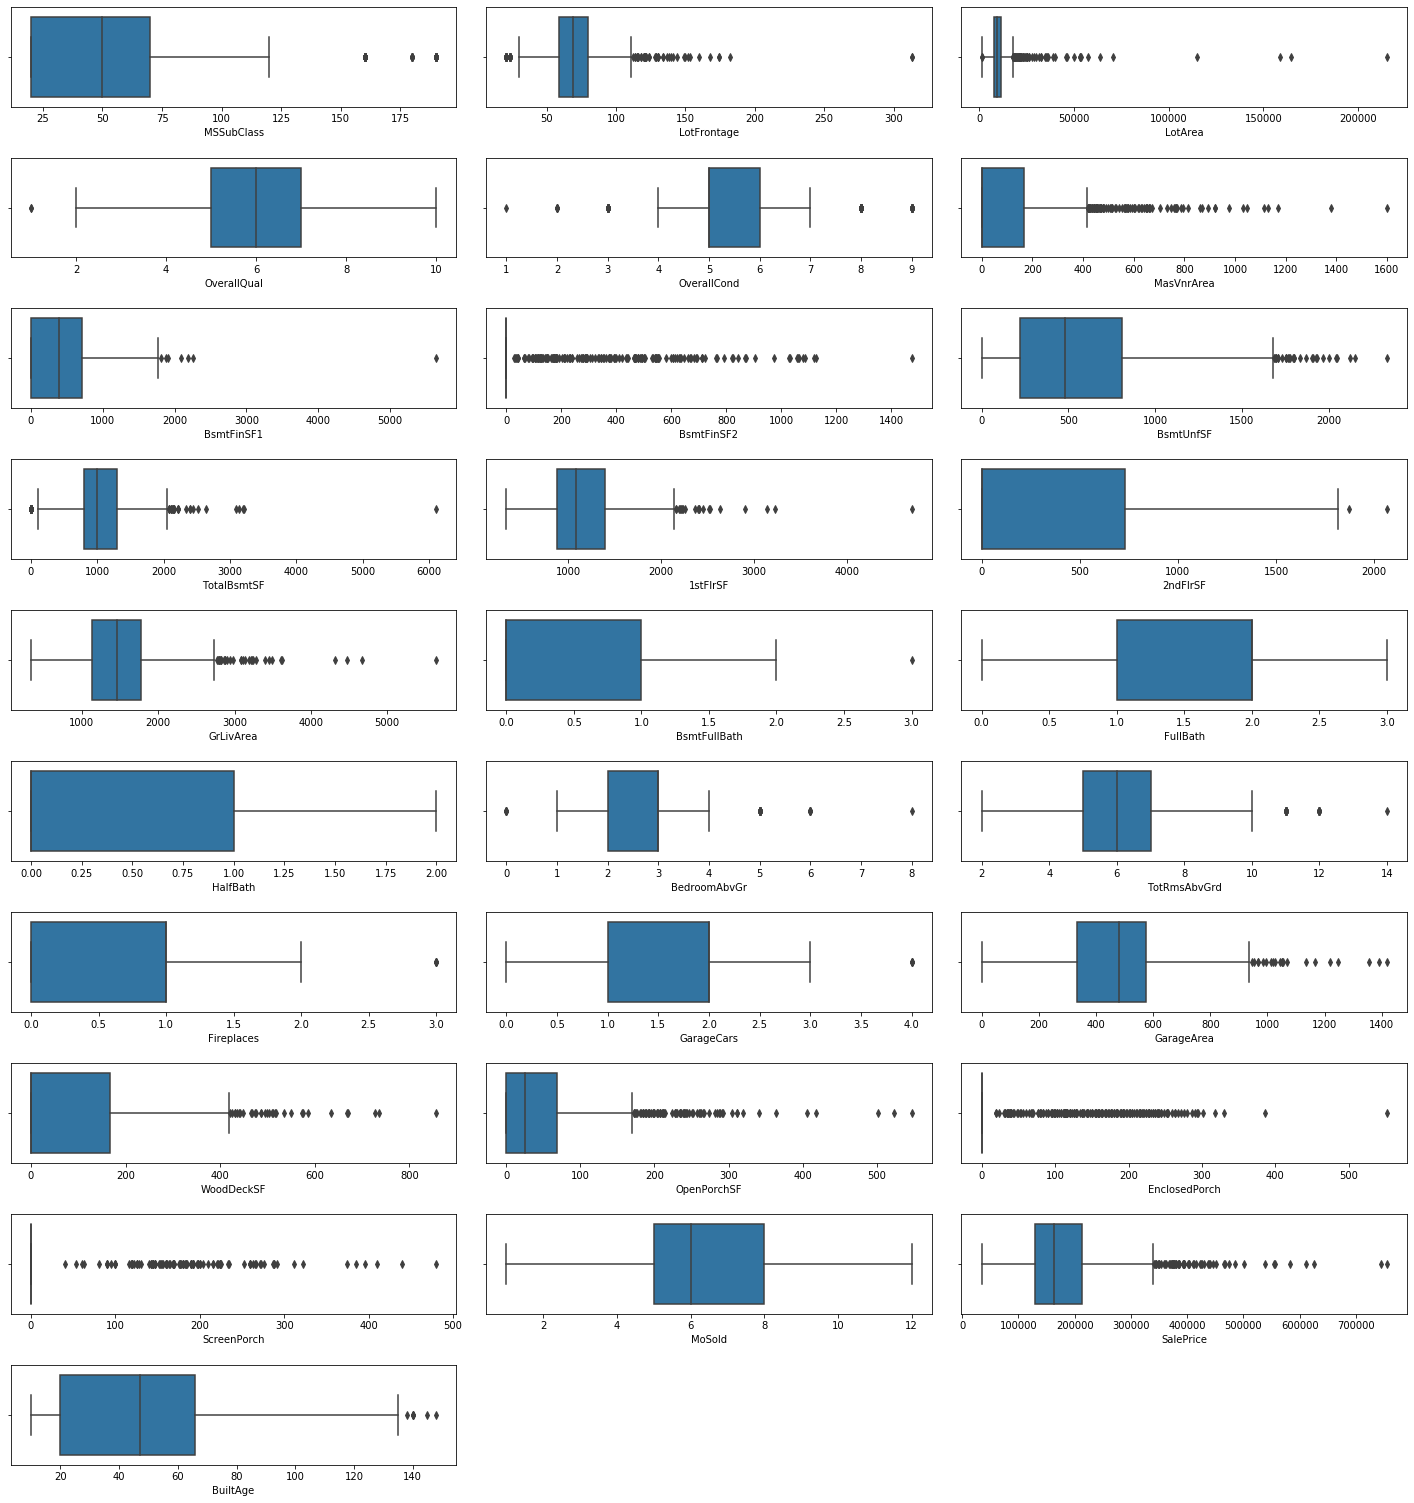

In [16]:
houseDf_numerical = houseDf.select_dtypes(include = [np.number])
plt.figure(figsize=(20,25))
for i in enumerate(houseDf_numerical):
    plt.subplot(12,3,i[0]+1)
    sns.boxplot(houseDf[i[1]])
    plt.tight_layout(pad=2.0)

plt.show()

In [17]:
#Outlier treatment
# Removing values beyond 98% for LotArea

LotArea_new = houseDf['LotArea'].quantile(0.98)
houseDf = houseDf[houseDf["LotArea"] < LotArea_new]

# Removing values beyond 98% for MasVnrArea

MasVnrArea_new = houseDf['MasVnrArea'].quantile(0.98)
houseDf = houseDf[houseDf["MasVnrArea"] < MasVnrArea_new]

# Removing values beyond 99% for TotalBsmtSF

TotalBsmtSF_new = houseDf['TotalBsmtSF'].quantile(0.99)
houseDf = houseDf[houseDf["TotalBsmtSF"] < TotalBsmtSF_new]

# Removing values beyond 99% for WoodDeckSF

WoodDeckSF_new = houseDf['WoodDeckSF'].quantile(0.99)
houseDf = houseDf[houseDf["WoodDeckSF"] < WoodDeckSF_new]

# Removing values beyond 99% for OpenPorchSF

OpenPorchSF_new = houseDf['OpenPorchSF'].quantile(0.99)
houseDf = houseDf[houseDf["OpenPorchSF"] < OpenPorchSF_new]

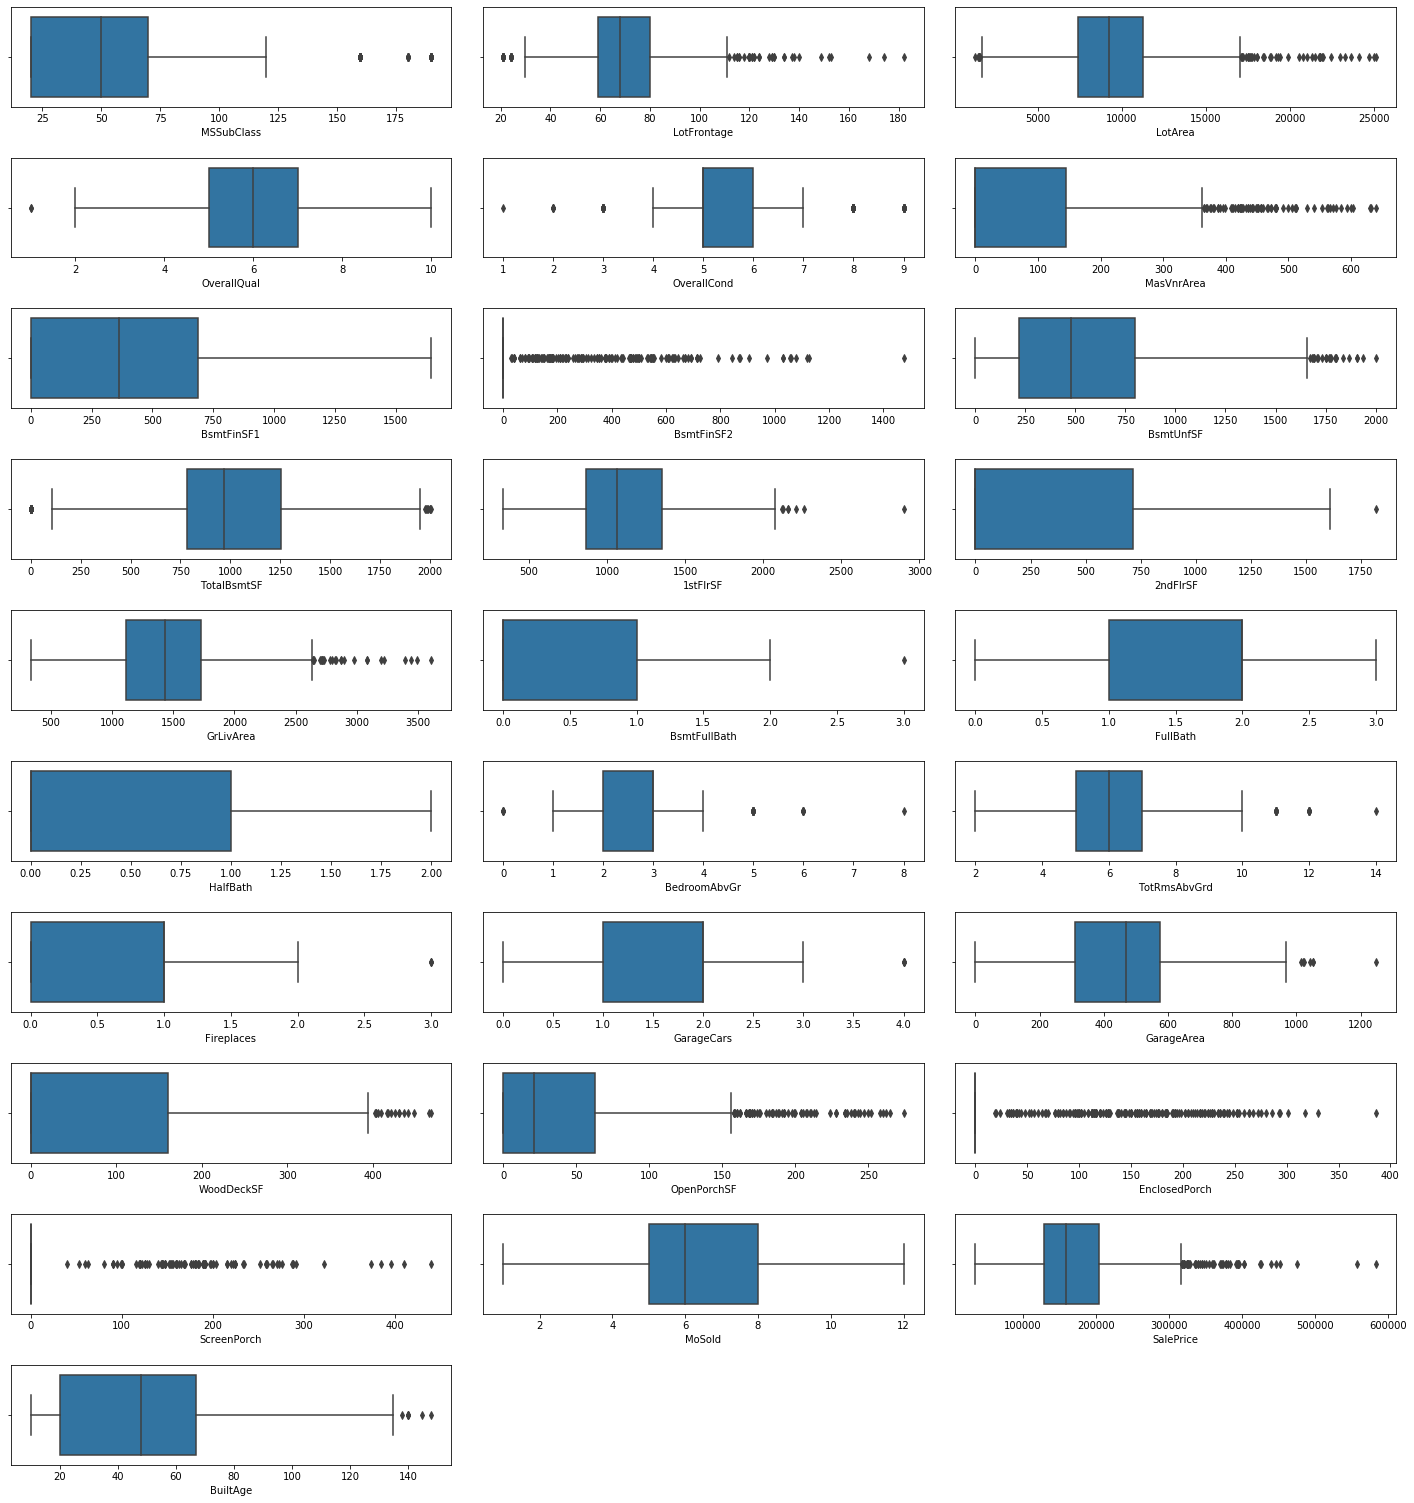

In [18]:
# Checking the box plots of the numerical variables
houseDf_numerical = houseDf.select_dtypes(include = [np.number])
plt.figure(figsize=(20,25))
for i in enumerate(houseDf_numerical):
    plt.subplot(12,3,i[0]+1)
    sns.boxplot(houseDf[i[1]])
    plt.tight_layout(pad=2.0)

plt.show()

## Imputing the columns.

In [19]:
# Checking the MasVnrType
print('Total number of Nan values in MasVnrType: {0}'.format(houseDf['MasVnrType'].isnull().sum()))
print(houseDf.MasVnrType.value_counts(normalize = True))

Total number of Nan values in MasVnrType: 0
None       0.607988
BrkFace    0.295858
Stone      0.086538
BrkCmn     0.009615
Name: MasVnrType, dtype: float64


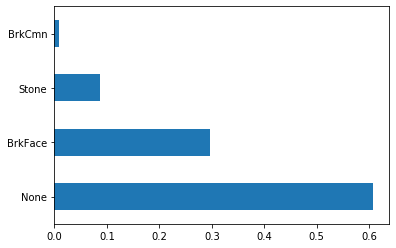

In [20]:
houseDf['MasVnrType'] = houseDf['MasVnrType'].replace(np.nan,houseDf.MasVnrType.mode()[0])
houseDf.MasVnrType.value_counts(normalize=True).plot.barh()
plt.show()

In [21]:
houseDf.MasVnrType.value_counts(normalize = True)

None       0.607988
BrkFace    0.295858
Stone      0.086538
BrkCmn     0.009615
Name: MasVnrType, dtype: float64

In [22]:
# Treating the MasVnrArea
print('Total number of Nan values in MasVnrArea: {0}'.format(houseDf['MasVnrArea'].isnull().sum()))
print(houseDf.MasVnrArea.describe())

Total number of Nan values in MasVnrArea: 0
count    1352.000000
mean       84.250740
std       134.242404
min         0.000000
25%         0.000000
50%         0.000000
75%       145.000000
max       640.000000
Name: MasVnrArea, dtype: float64


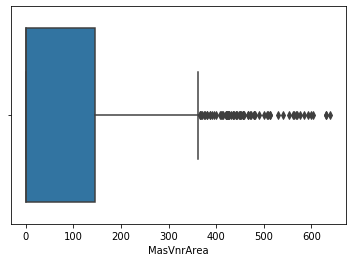

In [23]:
# The columns the missing values can be imputed by mean.
houseDf['MasVnrArea'] = houseDf['MasVnrArea'].replace(np.nan,houseDf.MasVnrArea.mean())
sns.boxplot(houseDf.MasVnrArea)
plt.show()

In [24]:
#Post imputation number of missing values check
houseDf['MasVnrArea'].isnull().sum()

0

In [25]:
# Treating the LotFrontage      
print('Total number of Nan values in LotFrontage: {0}'.format(houseDf['LotFrontage'].isnull().sum()))
print(houseDf.LotFrontage.describe())

Total number of Nan values in LotFrontage: 232
count    1120.000000
mean       68.730357
std        21.354796
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       182.000000
Name: LotFrontage, dtype: float64


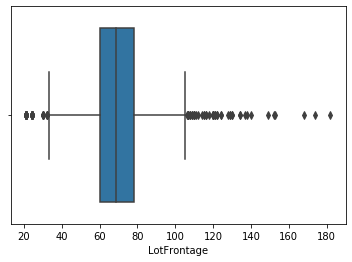

In [26]:
# Imputing the missing values of the column with mean.
houseDf['LotFrontage'] = houseDf['LotFrontage'].replace(np.nan,houseDf.LotFrontage.mean())
sns.boxplot(houseDf.LotFrontage)
plt.show()

In [27]:
houseDf.isnull().sum()/len(houseDf.index)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Alley            0.0
LotShape         0.0
LotConfig        0.0
Neighborhood     0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
BsmtFullBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
ScreenPorch      0.0
PoolQC           0.0
Fence            0.0
MiscFeature  

## EDA

OverallQual
1       100300
2       155311
3      1749475
4     11856646
5     49798369
6     57122291
7     61105389
8     39039300
9     10882152
10     2403311
Name: SalePrice, dtype: int64


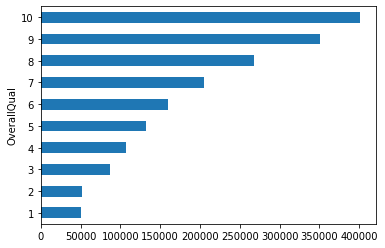

In [28]:
# BuiltAge vs SalePrice.
print(houseDf.groupby('OverallQual')['SalePrice'].sum())
houseDf.groupby(['OverallQual'])['SalePrice'].mean().plot.barh()

OverallCond
1        61000
2       709932
3      2209711
4      5846391
5    145508509
6     35020921
7     29629555
8     10799425
9      4427100
Name: SalePrice, dtype: int64


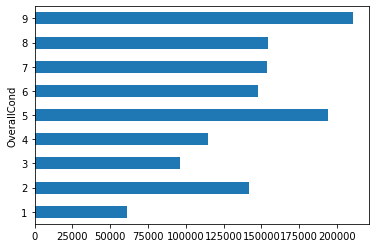

In [29]:
# OverallCond vs SalePrice.
print(houseDf.groupby('OverallCond')['SalePrice'].sum())
houseDf.groupby(['OverallCond'])['SalePrice'].mean().plot.barh()

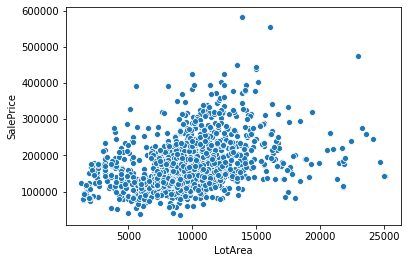

In [30]:
# LotArea vs SalePrice
sns.scatterplot(x="LotArea", y="SalePrice", data=houseDf)
plt.show()

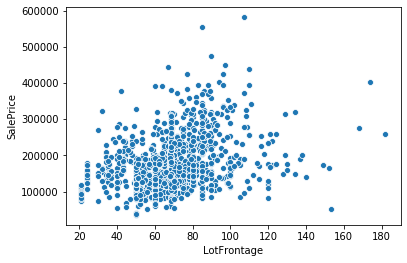

In [31]:
# LotFrontage vs SalePrice
sns.scatterplot(x="LotFrontage", y="SalePrice", data=houseDf)
plt.show()

In [32]:
# Checking correlation between the numerical variables.
houseDf_numerical = houseDf.select_dtypes(include = [np.number])
corr = houseDf_numerical.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,BuiltAge
MSSubClass,1.000000,-0.400448,-0.392531,0.060443,-0.060019,0.024571,-0.074029,-0.050699,-0.127501,-0.245790,-0.253881,0.318802,0.106453,0.005306,0.150066,0.185649,-0.031141,0.052453,-0.031734,-0.040943,-0.105706,-0.030784,0.004192,-0.011274,-0.019850,-0.011804,-0.069559,-0.032483
LotFrontage,-0.400448,1.000000,0.568655,0.191523,-0.052058,0.162509,0.110395,0.027446,0.139419,0.289187,0.344729,0.058085,0.305924,0.033718,0.167618,0.042471,0.254772,0.304527,0.202740,0.272787,0.305853,0.079132,0.135152,-0.001964,0.053639,0.025715,0.345203,-0.119242
LotArea,-0.392531,0.568655,1.000000,0.172759,-0.006247,0.095889,0.144879,0.066552,0.090778,0.287499,0.391655,0.118705,0.395271,0.067097,0.187441,0.095597,0.285122,0.370390,0.309945,0.259679,0.297677,0.136589,0.134955,-0.000641,0.100366,0.039505,0.378297,-0.054262
OverallQual,0.060443,0.191523,0.172759,1.000000,-0.087540,0.369110,0.192410,-0.062669,0.286389,0.507792,0.430242,0.274920,0.557488,0.097025,0.539699,0.245708,0.111471,0.388763,0.380880,0.586410,0.539104,0.222820,0.356811,-0.121409,0.072129,0.085373,0.800283,-0.574927
OverallCond,-0.060019,-0.052058,-0.006247,-0.087540,1.000000,-0.127083,-0.016078,0.045649,-0.144035,-0.162053,-0.135706,0.031308,-0.067321,-0.034117,-0.202756,-0.050080,0.013769,-0.048577,-0.011112,-0.177432,-0.135757,0.003622,-0.053040,0.087777,0.064269,-0.010857,-0.067983,0.373276
MasVnrArea,0.024571,0.162509,0.095889,0.369110,-0.127083,1.000000,0.215363,-0.056336,0.086770,0.308845,0.300034,0.108120,0.308045,0.094587,0.241104,0.165097,0.119177,0.241410,0.225486,0.337557,0.339933,0.123310,0.167495,-0.109149,0.072838,0.025654,0.409252,-0.306571
BsmtFinSF1,-0.074029,0.110395,0.144879,0.192410,-0.016078,0.215363,1.000000,-0.059107,-0.557061,0.428386,0.349751,-0.195786,0.070962,0.650096,0.030720,-0.033456,-0.116030,-0.036685,0.204621,0.189702,0.229774,0.196293,0.061874,-0.120258,0.069234,0.023582,0.354587,-0.247532
BsmtFinSF2,-0.050699,0.027446,0.066552,-0.062669,0.045649,-0.056336,-0.059107,1.000000,-0.223886,0.093314,0.091402,-0.088189,-0.011288,0.149426,-0.071808,-0.020803,-0.010722,-0.034188,0.023783,-0.040545,-0.012059,0.087667,-0.004672,0.043699,0.040270,-0.025786,-0.023242,0.043215
BsmtUnfSF,-0.127501,0.139419,0.090778,0.286389,-0.144035,0.086770,-0.557061,-0.223886,1.000000,0.438089,0.311896,-0.002980,0.229013,-0.426294,0.266280,-0.060464,0.160636,0.238602,0.042410,0.204651,0.176220,-0.039189,0.139369,0.000882,-0.012228,0.030336,0.204307,-0.138014
TotalBsmtSF,-0.245790,0.289187,0.287499,0.507792,-0.162053,0.308845,0.428386,0.093314,0.438089,1.000000,0.770771,-0.252018,0.332117,0.283001,0.305846,-0.113437,0.051965,0.216816,0.279834,0.421233,0.444164,0.204517,0.223290,-0.111457,0.077789,0.049382,0.606801,-0.407266


### Plotting heat map for the obtained variables


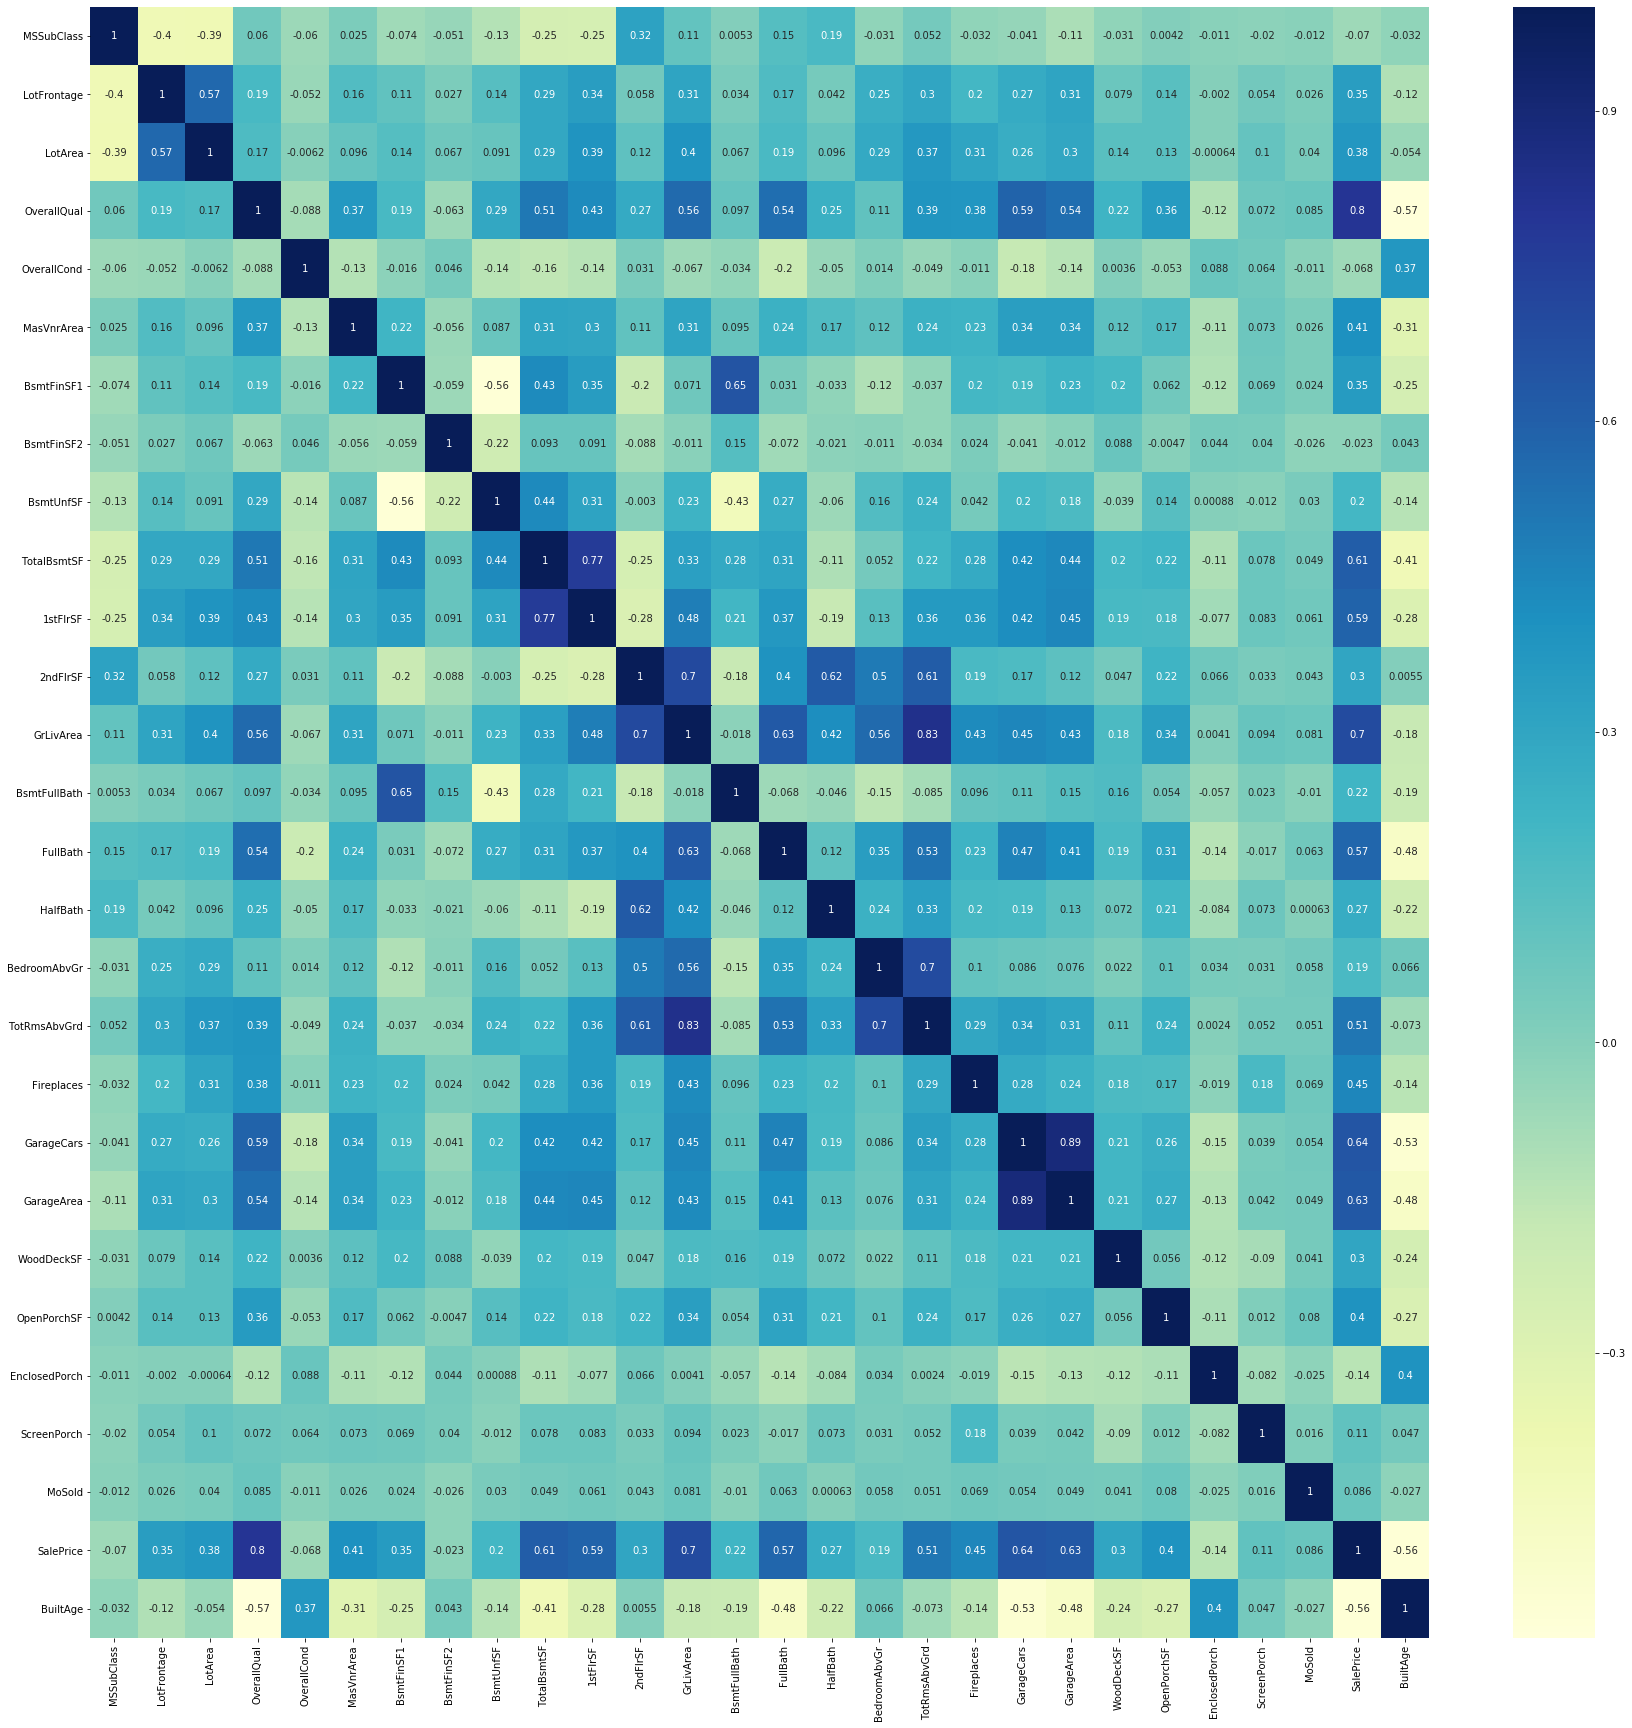

In [33]:
plt.figure(figsize=(30,30))
ax = sns.heatmap(corr, cmap="YlGnBu", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top - 0.5)
plt.show()

We see that GrLivArea(Above grade (ground) living area square feet) look to be highly positively correleated to the sale price and BuiltAge to be highly negatively correlated to sale price.

As we see these values are highly correlated to each other:

- GarageCars and GarageArea
- GrLivArea and TotRmsAbvGrd

In [34]:
houseDf.drop(['GarageArea', 'TotRmsAbvGrd'],axis=1,inplace=True)

## Creating dummy variables


In [35]:
# Creating dummy variables for the categorical columns
houseDf_categorical = houseDf.select_dtypes(exclude = [np.number])
for i in houseDf_categorical.columns:
    ml = pd.get_dummies(houseDf[i],drop_first=True,prefix=i,prefix_sep='_')
    # Dropping ith column from the dataframe
    houseDf = houseDf.drop(i, axis=1)
    # Adding the results to the master dataframe
    houseDf = pd.concat([houseDf,ml], axis=1)

In [36]:
# Checking the shape of the data frame after created the dummies 
print(houseDf.shape)
houseDf.head()

(1352, 160)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,BuiltAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,1710,1,2,1,3,0,2,0,61,0,0,2,208500,17,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0
2,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,0,0,5,181500,44,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0
3,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,1786,1,2,1,3,1,2,0,42,0,0,9,223500,19,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0
4,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,1717,1,1,0,3,1,3,0,35,272,0,2,140000,105,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,

In [37]:
# Checking the correlation between the variables
corr_matrix1 = houseDf.corr()
corr_matrix1

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,BuiltAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
MSSubClass,1.000000,-4.004481e-01,-0.392531,0.060443,-0.060019,0.024571,-0.074029,-0.050699,-0.127501,-0.245790,-0.253881,0.318802,0.106453,0.005306,0.150066,0.185649,-0.031141,-0.031734,-0.040943,-0.030784,0.004192,-0.011274,-0.019850,-0.011804,-0.069559,-0.032483,0.167187,0.059883,-0.343011,0.278299,-0.138739,0.171445,-0.012384,-0.029010,0.112135,-0.031749,0.012312,0.045499,0.075030,0.093553,0.265990,-0.052102,0.015424,-0.116717,0.008523,-0.001861,-0.003870,-0.011157,0.274136,-0.014344,-0.182579,0.164576,-0.069916,-0.008186,0.048280,0.062336,0.048790,-0.088035,0.011761,0.094944,0.101734,-0.075795,0.018036,-0.006948,-0.472954,0.057603,0.084954,0.356744,0.190196,0.147540,0.120905,0.013864,-0.128134,0.012150,7.132186e-03,0.021117,-0.033804,-0.057636,-0.004604,0.168354,-0.017375,-0.023894,0.071014,0.060322,-0.033804,-0.012798,-0.059163,-0.063961,-0.033607,0.021741,0.107145,-0.019842,-0.004604,0.168354,0.010262,0.016575,0.070052,-0.023894,-0.046096,0.006875,-0.014805,-0.075297,-0.073904,0.032960,0.051555,-0.025793,-0.018820,0.027589,0.065230,-0.063188,-0.092563,0.077685,0.018953,0.032889,-0.004265,-0.003918,0.176373,0.015010,-0.153460,0.055580,3.961391e-03,-0.076475,0.015117,-0.074438,0.101275,0.000872,0.015010,-0.095477,0.030421,0.010507,-0.012485,-0.007819,0.022916,1.626906e-02,0.032704,-0.027569,-0.044609,-0.046748,0.026828,-0.015005,0.039480,-0.146117,0.042171,0.082032,0.039891,0.052063,0.0

In [38]:
# Finding out the top 10 correlated values for T0.
corr_matrix0 = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool)).unstack().reset_index()
corr_matrix0.columns = ['VARIABLE_1', 'VARIABLE_2', 'CORRELATION']
corr_matrix0.dropna(subset = ['CORRELATION'], inplace = True)
corr_matrix0['CORRELATION'] = round(corr_matrix0['CORRELATION'],2)
corr_matrix0['CORRELATION'] = corr_matrix0['CORRELATION'].abs()
corr0_top10 = corr_matrix0.sort_values('CORRELATION', ascending = False).head(40)
corr0_top10

,VARIABLE_1,VARIABLE_2,CORRELATION
14798,Exterior2nd_CBlock,Exterior1st_CBlock,1.00
20277,BsmtFinType1_None,BsmtQual_None,1.00
23666,GarageFinish_None,GarageType_None,1.00
20282,BsmtFinType1_None,BsmtExposure_None,0.99
19637,BsmtExposure_None,BsmtQual_None,0.99
14959,Exterior2nd_CmentBd,Exterior1st_CemntBd,0.98
16246,Exterior2nd_VinylSd,Exterior1st_VinylSd,0.98
15442,Exterior2nd_MetalSd,Exterior1st_MetalSd,0.97
25436,MiscFeature_Shed,MiscFeature_None,0.95
11590,RoofStyle_Hip,RoofStyle_Gable,0.94


We observe that there is a high correlation between the variables:

- MiscFeature_Shed -> MiscFeature_None
- RoofStyle_Hip -> RoofStyle_Gable
- ExterQual_TA -> ExterQual_Gd
- KitchenQual_TA -> KitchenQual_Gd
- MSZoning_RM -> MSZoning_RL
- MasVnrType_None -> MasVnrType_BrkFace
- Foundation_PConc -> Foundation_CBlock
- BsmtQual_TA -> BsmtQual_Gd
- Fence_None -> Fence_MnPrv
- Exterior2nd_CBlock -> Exterior1st_CBlock
- BsmtFinType1_None -> BsmtQual_None
- GarageFinish_None -> GarageType_None
- GarageType_Detchd -> GarageType_Attchd 
Hence we are removing all the variables marked on the right

In [39]:
houseDf.drop(['MiscFeature_None', 'RoofStyle_Gable', 'ExterQual_Gd', 'KitchenQual_Gd',
              'MSZoning_RL','MasVnrType_BrkFace','Foundation_CBlock','BsmtQual_Gd','Fence_MnPrv',
            'Exterior1st_CBlock','BsmtQual_None','GarageType_None', 'GarageType_Attchd'], axis=1, inplace=True)
houseDf.shape

(1352, 147)

## Transforming the SalePrice into a normal distribution

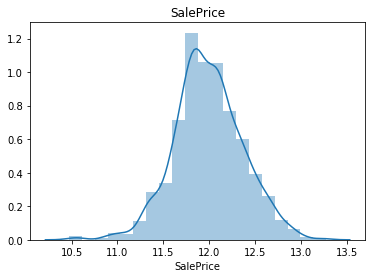

In [40]:
# As the sale is not normally distributed, we transform it into its log and use it in the model.
houseDf.SalePrice = np.log(houseDf.SalePrice)
plt.title('SalePrice')
sns.distplot(houseDf.SalePrice,bins=20)
plt.show()

## Splitting into train and test dataset

In [41]:
#importing the train test split library
from sklearn.model_selection import train_test_split

In [42]:
X = houseDf.drop('SalePrice',axis=1)
# Assigning the target variable to y
y = houseDf.pop('SalePrice')

In [43]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,BuiltAge,MSZoning_FV,MSZoning_RH,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_TA,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,1710,1,2,1,3,0,2,0,61,0,0,2,17,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
2,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,0,0,5,44,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,1786,1,2,1,3,1,2,0,42,0,0,9,19,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
4,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,1717,1,1,0,3,1,3,0,35,272,0,2,105,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
5,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,0,0,12,20,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [44]:
y.head()

Id
1    12.247694
2    12.109011
3    12.317167
4    11.849398
5    12.429216
Name: SalePrice, dtype: float64

### Feature Scaling

In [45]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'GarageFinish_RFn', 'GarageFinish_Unf', 'PoolQC_Gd', 'PoolQC_None',
       'Fence_GdWo', 'Fence_MnWw', 'Fence_None', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_TenC'],
      dtype='object', length=146)

In [46]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature selection using RFE

In [47]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
from sklearn.feature_selection import RFE

# Running RFE with the output number of the variable equal to 25
rfe = RFE(linReg, 25)
rfe = rfe.fit(X_train, y_train)

In [48]:
# Columns that have been identified by RFE method
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'BuiltAge',
       'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace',
       'Foundation_PConc', 'BsmtFinType1_Unf', 'HeatingQC_Fa', 'HeatingQC_TA',
       'FireplaceQu_None'],
      dtype='object')

In [49]:
# Assign the 25 columns to X_update
X_update = X_train[col]
# Associate the new 25 columns to X_train and X_test for further analysis
X_train = X_update[X_update.columns]
X_test =  X_test[X_train.columns]

## Model building and evaluation: Ridge Regression

In [50]:
# list of alphas to tune
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
#params = {'alpha': list_alpha}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [51]:
# Checking model cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <=500]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003401,0.002405,0.000399,0.000489,0.0001,{'alpha': 0.0001},-0.077790,-0.094488,-0.069781,-0.087426,-0.071526,-0.080200,0.009440,24,-0.079119,-0.074059,-0.080185,-0.074656,-0.078876,-0.077379,0.002513
1,0.002218,0.003137,0.002837,0.002213,0.001,{'alpha': 0.001},-0.077790,-0.094488,-0.069781,-0.087425,-0.071526,-0.080200,0.009440,23,-0.079119,-0.074059,-0.080185,-0.074656,-0.078876,-0.077379,0.002513
2,0.002805,0.003012,0.000882,0.001316,0.01,{'alpha': 0.01},-0.077789,-0.094488,-0.069780,-0.087425,-0.071526,-0.080199,0.009440,22,-0.079119,-0.074059,-0.080185,-0.074656,-0.078876,-0.077379,0.002513
3,0.002416,0.002596,0.003259,0.002852,0.1,{'alpha': 0.1},-0.077787,-0.094487,-0.069776,-0.087423,-0.071520,-0.080196,0.009441,21,-0.079120,-0.074057,-0.080184,-0.074655,-0.078876,-0.077379,0.002514
4,0.002724,0.002461,0.002334,0.002755,0.2,{'alpha': 0.2},-0.077784,-0.094486,-0.069772,-0.087420,-0.071514,-0.080193,0.009442,20,-0.079121,-0.074056,-0.080183,-0.074654,-0.078876,-0.077378,0.002514


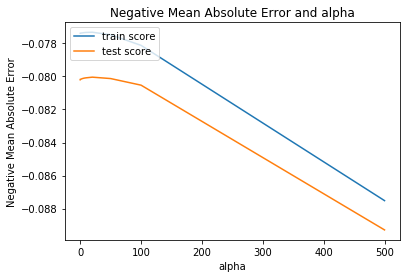

In [52]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [53]:
# get the best estimator for lambda
model_cv.best_estimator_

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [54]:
# Check the coefficient with 20.0
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01442044,  0.01406115,  0.02025286,  0.07727486,  0.05814543,
        0.03599503,  0.05556682,  0.02855933,  0.05552451,  0.06647226,
        0.04109529,  0.01527492,  0.01250883, -0.07544815,  0.02366756,
        0.02185379, -0.01336073,  0.01960809,  0.01613438,  0.01521147,
        0.03108056, -0.01523907, -0.01555871, -0.01397189, -0.02268832])

In [55]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.01676131127342131

In [56]:
# model with optimal alpha
# Ridge regression

lm = Ridge(alpha=20.0)

lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9143701645037845
0.8799177553314871


In [57]:
# Ridge model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.992),
 ('MSSubClass', -0.014),
 ('LotFrontage', 0.014),
 ('LotArea', 0.02),
 ('OverallQual', 0.077),
 ('OverallCond', 0.058),
 ('MasVnrArea', 0.036),
 ('BsmtFinSF1', 0.056),
 ('BsmtFinSF2', 0.029),
 ('BsmtUnfSF', 0.056),
 ('TotalBsmtSF', 0.066),
 ('1stFlrSF', 0.041),
 ('2ndFlrSF', 0.015),
 ('GrLivArea', 0.013),
 ('BsmtFullBath', -0.075),
 ('FullBath', 0.024),
 ('HalfBath', 0.022),
 ('BedroomAbvGr', -0.013),
 ('Fireplaces', 0.02),
 ('GarageCars', 0.016),
 ('WoodDeckSF', 0.015),
 ('OpenPorchSF', 0.031),
 ('EnclosedPorch', -0.015),
 ('ScreenPorch', -0.016),
 ('MoSold', -0.014),
 ('BuiltAge', -0.023)]

## Lasso

In [58]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [59]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003401,0.002405,0.000399,0.000489,0.0001,{'alpha': 0.0001},-0.077790,-0.094488,-0.069781,-0.087426,-0.071526,-0.080200,0.009440,24,-0.079119,-0.074059,-0.080185,-0.074656,-0.078876,-0.077379,0.002513
1,0.002218,0.003137,0.002837,0.002213,0.001,{'alpha': 0.001},-0.077790,-0.094488,-0.069781,-0.087425,-0.071526,-0.080200,0.009440,23,-0.079119,-0.074059,-0.080185,-0.074656,-0.078876,-0.077379,0.002513
2,0.002805,0.003012,0.000882,0.001316,0.01,{'alpha': 0.01},-0.077789,-0.094488,-0.069780,-0.087425,-0.071526,-0.080199,0.009440,22,-0.079119,-0.074059,-0.080185,-0.074656,-0.078876,-0.077379,0.002513
3,0.002416,0.002596,0.003259,0.002852,0.1,{'alpha': 0.1},-0.077787,-0.094487,-0.069776,-0.087423,-0.071520,-0.080196,0.009441,21,-0.079120,-0.074057,-0.080184,-0.074655,-0.078876,-0.077379,0.002514
4,0.002724,0.002461,0.002334,0.002755,0.2,{'alpha': 0.2},-0.077784,-0.094486,-0.069772,-0.087420,-0.071514,-0.080193,0.009442,20,-0.079121,-0.074056,-0.080183,-0.074654,-0.078876,-0.077378,0.002514


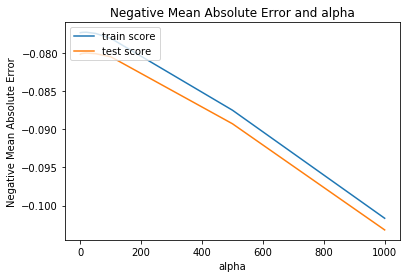

In [60]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [61]:
# get the best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
# check the coefficient values with best lambda

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01421318,  0.01315273,  0.02020866,  0.07940276,  0.05903831,
        0.03658815,  0.05562108,  0.        ,  0.01992243,  0.10592791,
        0.04076925,  0.01426065,  0.01173365, -0.07947476,  0.02350029,
        0.02070181, -0.01172758,  0.0181698 ,  0.01517048,  0.01455091,
        0.0293204 , -0.01406639, -0.01415134, -0.01265106, -0.02219091])

In [63]:
# Check the mean squared error
mean_squared_error(y_test, lasso.predict(X_test))

0.016609575150317052

In [64]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9142126621085483
0.8810048310359131


In [65]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.992),
 ('MSSubClass', -0.014),
 ('LotFrontage', 0.013),
 ('LotArea', 0.02),
 ('OverallQual', 0.079),
 ('OverallCond', 0.059),
 ('MasVnrArea', 0.037),
 ('BsmtFinSF1', 0.056),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.02),
 ('TotalBsmtSF', 0.106),
 ('1stFlrSF', 0.041),
 ('2ndFlrSF', 0.014),
 ('GrLivArea', 0.012),
 ('BsmtFullBath', -0.079),
 ('FullBath', 0.024),
 ('HalfBath', 0.021),
 ('BedroomAbvGr', -0.012),
 ('Fireplaces', 0.018),
 ('GarageCars', 0.015),
 ('WoodDeckSF', 0.015),
 ('OpenPorchSF', 0.029),
 ('EnclosedPorch', -0.014),
 ('ScreenPorch', -0.014),
 ('MoSold', -0.013),
 ('BuiltAge', -0.022)]

In [66]:
# model with double the optimal alpha value
# Ridge regression

lm = Ridge(alpha= 40.0)

lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9141476548474018
0.8795561533981061


In [67]:
# Ridge model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.992),
 ('MSSubClass', -0.014),
 ('LotFrontage', 0.014),
 ('LotArea', 0.02),
 ('OverallQual', 0.077),
 ('OverallCond', 0.056),
 ('MasVnrArea', 0.036),
 ('BsmtFinSF1', 0.054),
 ('BsmtFinSF2', 0.029),
 ('BsmtUnfSF', 0.054),
 ('TotalBsmtSF', 0.066),
 ('1stFlrSF', 0.042),
 ('2ndFlrSF', 0.016),
 ('GrLivArea', 0.012),
 ('BsmtFullBath', -0.072),
 ('FullBath', 0.023),
 ('HalfBath', 0.022),
 ('BedroomAbvGr', -0.014),
 ('Fireplaces', 0.02),
 ('GarageCars', 0.016),
 ('WoodDeckSF', 0.015),
 ('OpenPorchSF', 0.032),
 ('EnclosedPorch', -0.015),
 ('ScreenPorch', -0.016),
 ('MoSold', -0.015),
 ('BuiltAge', -0.023)]

The most important predictor variables after implementation of the changes in ridge hyperparameter(alpha) are: 
'OverallQual', 'OverallCond','TotalBsmtSF','BsmtFinSF1', 'BsmtUnfSF'

In [68]:
# model with double the optimal alpha value
# lasso regression
lm = Lasso(alpha=0.002)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9138380853391844
0.8813254388753121


In [69]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.992),
 ('MSSubClass', -0.013),
 ('LotFrontage', 0.013),
 ('LotArea', 0.02),
 ('OverallQual', 0.081),
 ('OverallCond', 0.058),
 ('MasVnrArea', 0.037),
 ('BsmtFinSF1', 0.054),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.016),
 ('TotalBsmtSF', 0.109),
 ('1stFlrSF', 0.041),
 ('2ndFlrSF', 0.014),
 ('GrLivArea', 0.011),
 ('BsmtFullBath', -0.079),
 ('FullBath', 0.022),
 ('HalfBath', 0.019),
 ('BedroomAbvGr', -0.011),
 ('Fireplaces', 0.017),
 ('GarageCars', 0.014),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', 0.029),
 ('EnclosedPorch', -0.013),
 ('ScreenPorch', -0.013),
 ('MoSold', -0.012),
 ('BuiltAge', -0.022)]

The most important predictor variables after implementation of the changes in lasso hyperparameter(alpha) are: 
- 'OverallQual', 'OverallCond','TotalBsmtSF','BsmtFinSF1', '1stFlrSF'

We observe a slight change in r2square value when the alpha value is doubled for both ridge and lasso.


In [70]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
X_train1 = X_train.drop(['OverallQual', 'OverallCond','TotalBsmtSF','BsmtFinSF1', '1stFlrSF'],axis=1)
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [71]:
cv_results = pd.DataFrame(model_cv.cv_results_)

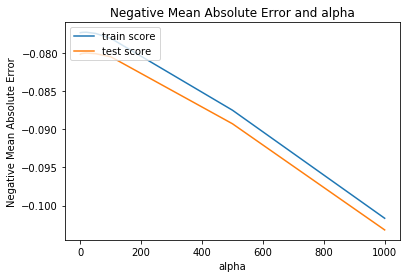

In [72]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [73]:
# get the best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [74]:
# check the coefficient values with best lambda
alpha = 0.001
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train1, y_train) 
lasso.coef_

array([-0.02600511,  0.01402876,  0.01331772, -0.02656951,  0.17525392,
        0.05916883,  0.02457423,  0.02064898, -0.09065325,  0.04032654,
        0.03640438, -0.00211895,  0.02595806,  0.02842961,  0.00837669,
        0.03619181, -0.04005437, -0.0309187 , -0.03028577, -0.03209524])

In [75]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train1, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train1.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.991),
 ('MSSubClass', -0.026),
 ('LotFrontage', 0.014),
 ('LotArea', 0.013),
 ('OverallQual', -0.027),
 ('OverallCond', 0.175),
 ('MasVnrArea', 0.059),
 ('BsmtFinSF1', 0.025),
 ('BsmtFinSF2', 0.021),
 ('BsmtUnfSF', -0.091),
 ('TotalBsmtSF', 0.04),
 ('1stFlrSF', 0.036),
 ('2ndFlrSF', -0.002),
 ('GrLivArea', 0.026),
 ('BsmtFullBath', 0.028),
 ('FullBath', 0.008),
 ('HalfBath', 0.036),
 ('BedroomAbvGr', -0.04),
 ('Fireplaces', -0.031),
 ('GarageCars', -0.03),
 ('WoodDeckSF', -0.032)]